In [2]:
import pandas as pd

In [1]:
import seaborn as sns

sns.set_style("dark")

In [3]:
df = pd.read_csv('steam.csv', sep=',')

In [4]:
df.pop('appid')
# Convert english too boolean
df['english'] = df['english'].astype('bool')
# set release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
# create 3 seperate platform fields instead of 1
df['windows'], df['mac'], df['linux'] = df['platforms'].apply(lambda x: 'windows' in x),df['platforms'].apply(lambda x: 'mac' in x),df['platforms'].apply(lambda x: 'linux' in x)
# Split owners categorical value in two numerical values
df['owners_low'] = df['owners'].apply(lambda x: x.split('-')[0]).astype('int')
df['owners_high'] = df['owners'].apply(lambda x: x.split('-')[1]).astype('int')
# Create int out of data column
df['release_year'] = df['release_date'].dt.year
genres = df['genres'].apply(lambda x: x.split(';')[0])

In [ ]:
medianPlaytimeFilter = df['median_playtime']> 0.5
ownersFilter = df['owners_low'] > 20000 #lowest range above 0
noFreeGameFilter = df['price'] > 0.1
reviewFilter = df['positive_ratings'] > 5

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              27075 non-null  object        
 1   release_date      27075 non-null  datetime64[ns]
 2   english           27075 non-null  bool          
 3   developer         27075 non-null  object        
 4   publisher         27075 non-null  object        
 5   platforms         27075 non-null  object        
 6   required_age      27075 non-null  int64         
 7   categories        27075 non-null  object        
 8   genres            27075 non-null  object        
 9   steamspy_tags     27075 non-null  object        
 10  achievements      27075 non-null  int64         
 11  positive_ratings  27075 non-null  int64         
 12  negative_ratings  27075 non-null  int64         
 13  average_playtime  27075 non-null  int64         
 14  median_playtime   2707

# The most expensive games

In [6]:
df[medianPlaytimeFilter][['name','price']].sort_values('price',ascending=False).head(10)

NameError: name 'medianPlaytimeFilter' is not defined

In [ ]:
series = df[df['positive_ratings'] > 5][medianPlaytimeFilter]['developer'].value_counts()
series.where(lambda x :  0 < x).dropna()

C:\Users\Stijn\AppData\Local\Temp/ipykernel_9580/1183673222.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  series = df[df['positive_ratings'] > 5][medianPlaytimeFilter]['developer'].value_counts()


Valve                                     26
EnsenaSoft                                26
Winged Cloud                              17
Square Enix                               17
Daedalic Entertainment                    17
                                          ..
IMGN.PRO                                   1
Autumn Moon                                1
Lord Kres                                  1
Acido Cinza                                1
Beijing Litchi Culture Media Co., Ltd.     1
Name: developer, Length: 4077, dtype: int64

In [ ]:
df[df['positive_ratings'] > 5][medianPlaytimeFilter]['required_age'].value_counts()

C:\Users\Stijn\AppData\Local\Temp/ipykernel_9580/70254092.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['positive_ratings'] > 5][medianPlaytimeFilter]['required_age'].value_counts()


0     5796
18     186
16     116
12      24
7        4
3        3
Name: required_age, dtype: int64

# Number of paid and free games

In [ ]:
df[noFreeGameFilter][df['price'] < 200][ownersFilter][medianPlaytimeFilter]['price'].count() , df[df['price'] < 200][ownersFilter][medianPlaytimeFilter]['price'].count()

C:\Users\Stijn\AppData\Local\Temp/ipykernel_9580/1283793119.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[noFreeGameFilter][df['price'] < 200][ownersFilter][medianPlaytimeFilter]['price'].count() , df[df['price'] < 200][ownersFilter][medianPlaytimeFilter]['price'].count()


(3616, 4351)

# Amount of games per year after 2005

C:\Users\Stijn\AppData\Local\Temp/ipykernel_9580/4157551761.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['release_year'] > 2005][df['positive_ratings'] > 5]['release_year'].value_counts().sort_values().plot(kind='bar')


<AxesSubplot:>

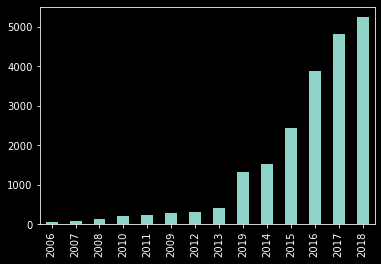

In [ ]:
df[df['release_year'] > 2005][df['positive_ratings'] > 5]['release_year'].value_counts().sort_values().plot(kind='bar')

# Amount of games that were played for longer than 30 hours

C:\Users\Stijn\AppData\Local\Temp/ipykernel_9580/3507090343.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['owners_low'] > 50000][df['median_playtime']> 30]['release_year'].value_counts().sort_values().plot(kind='bar')


<AxesSubplot:>

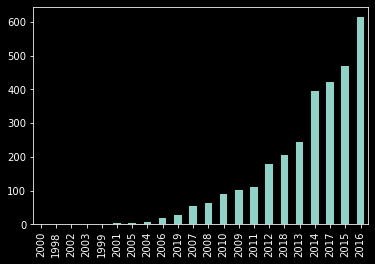

In [ ]:
df[ownersFilter][medianPlaytimeFilter]['release_year'].value_counts().sort_values().plot(kind='bar')

# Most positively reviewed games

In [ ]:
df.sort_values('positive_ratings',ascending = False).head(5)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,average_playtime,median_playtime,owners,price,windows,mac,linux,owners_low,owners_high,release_year
25,Counter-Strike: Global Offensive,2012-08-21,True,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,...,22494,6502,50000000-100000000,0.00,True,True,True,50000000,100000000,2012
22,Dota 2,2013-07-09,True,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,...,23944,801,100000000-200000000,0.00,True,True,True,100000000,200000000,2013
19,Team Fortress 2,2007-10-10,True,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,...,8495,623,20000000-50000000,0.00,True,True,True,20000000,50000000,2007
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,True,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,...,22938,12434,50000000-100000000,26.99,True,False,False,50000000,100000000,2017
121,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,...,12422,1875,10000000-20000000,6.99,True,True,True,10000000,20000000,2006
2478,Grand Theft Auto V,2015-04-13,True,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,Open World;Action;Multiplayer,...,9837,4834,10000000-20000000,24.99,True,False,False,10000000,20000000,2015
1467,PAYDAY 2,2013-08-13,True,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,windows;linux,18,Single-player;Multi-player;Co-op;Online Co-op;...,Action;RPG,Co-op;Action;FPS,...,3975,890,10000000-20000000,7.49,True,False,True,10000000,20000000,2013
3362,Unturned,2017-07-07,True,Smartly Dressed Games,Smartly Dressed Games,windows;mac;linux,0,Single-player;Online Multi-Player;Online Co-op...,Action;Adventure;Casual;Free to Play;Indie,Free to Play;Survival;Zombies,...,3248,413,20000000-50000000,0.00,True,True,True,20000000,50000000,2017
1120,Terraria,2011-05-16,True,Re-Logic,Re-Logic,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Indie;RPG,Sandbox;Adventure;Survival,...,5585,1840,5000000-10000000,6.99,True,True,True,5000000,10000000,2011
21,Left 4 Dead 2,2009-11-19,True,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Steam Achieve...,Action,Zombies;Co-op;FPS,...,1615,566,10000000-20000000,7.19,True,True,True,10000000,20000000,2009
